In [10]:
#MLP usando sklearn
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_petala','Largura_petala','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')

In [11]:
dataset

,Comprimento_sepal,Largura_sepal,Comprimento_petala,Largura_petala,Classificacao
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
y = dataset['Classificacao']
x = dataset.drop(['Classificacao'], axis=1)

y=pd.get_dummies(y)

y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


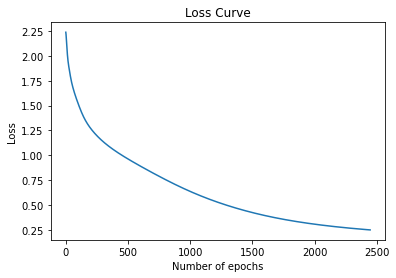

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#inicialização - Minha rede tera 4 entradas, 1º camada 10 neuronios, 2º camada 5 neuronios, saida com 3 neurios
Model = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=4000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=5) # verbode=0 to tirar log

#train
h = Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)

import matplotlib.pyplot as plt

plt.plot(range(1, h.n_iter_ + 1), h.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [9]:



#agora vou utilizar as funções de classificação estatística

print(classification_report(y_test,y_pred)) # Print 
#print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('O acerto foi de: ',accuracy_score(y_pred,y_test)) # Print accuracy score



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

O acerto foi de:  1.0


C:\Users\arauj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
